# *Project 2: Investigate A Dataset*

##### Data Analyst Nanodegree
##### 01/15/2018
##### Wassim Askoul

### _Part 1: A Question_

This project is aiming to investigate the labour force in different countries around the world through a period of time. The point of this investigation is to better understand what makes citizens of a country join the workforce and whether they would do it as self-employment or salaried employees. The datasets used are gathered from [Gapminder Tools](https://www.gapminder.org/data/). The data sources are:
* International Labour Organization for the datasets about Age 15-64 labor to population (%), Self-employed workers (% of all labor), and Salaried workers (% of all labor)
* Polity IV Project for the dataset about Democracy score (based on Polity IV)

First, I will load the mentioned datasets to take a look at what these datasets include, then I will explain how they are going to be utilized to develop questions that could be explored using them. Just to clarify, I am using python3 with the liberaries pandas, numpy and matplotlib; this investigation was developed using jupyter notebook and Anaconda.

In [75]:
#Liberaries inluded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings

#A magic line to allow us to include our data visualizations within this document
%matplotlib inline 

#This line is to avoid printing 2 warnings that have been taken care of in the Data Wrangling section
warnings.filterwarnings('ignore') 

democracy = pd.read_csv('C:/Users/David/Anaconda3/envs/DAND/indicatorpolityiv.csv')
labour = pd.read_csv('C:/Users/David/Anaconda3/envs/DAND/indicator_t15-64labourtopoppercent.csv')
selfemployed = pd.read_csv('C:/Users/David/Anaconda3/envs/DAND/indicator_tselfemployed.csv')
employee = pd.read_csv('C:/Users/David/Anaconda3/envs/DAND/indicator_tsalariedemployee.csv')

In [76]:
democracy.head()

,"Democracy, based on PolityIV",1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [77]:
labour.head()

,Total 15-64 labour to population (%),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,60.799999,60.700001,60.700001,60.599998,60.500000,60.500000,60.400002,60.400002,60.299999,...,59.599998,59.599998,59.599998,59.700001,59.799999,59.900002,60.000000,60.200001,60.299999,60.400002
1,Albania,81.400002,81.000000,80.800003,80.400002,79.900002,80.099998,79.699997,80.400002,81.000000,...,66.300003,66.400002,66.300003,66.300003,66.300003,66.300003,66.199997,66.199997,66.099998,66.500000
2,Algeria,46.900002,47.000000,47.000000,46.900002,46.900002,46.900002,47.700001,48.500000,49.299999,...,56.400002,56.799999,57.200001,57.799999,58.200001,58.400002,58.799999,59.000000,59.400002,59.700001
3,Angola,82.800003,82.800003,82.900002,82.900002,82.900002,83.000000,83.000000,83.099998,83.199997,...,83.099998,83.099998,83.000000,82.900002,83.000000,82.900002,82.900002,82.900002,82.800003,83.000000
4,Argentina,57.700001,57.900002,58.200001,58.599998,58.599998,58.799999,58.900002,58.900002,59.000000,...,65.900002,66.400002,66.900002,67.300003,67.800003,68.199997,68.599998,69.000000,69.500000,69.400002


In [78]:
selfemployed.head()

,Total self-employed (%),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.299999,NaN,27.799999,31.700001,NaN,NaN,NaN
1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.700000,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.5,26.200001,26.4,27.100000,27.200001,24.600000,24.500000,24.299999,23.1,NaN


In [79]:
employee.head()

,Total salaried employees (%),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.900002,NaN,64.800003,59.799999,NaN,NaN,NaN
1,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,77.000000,NaN,64.599998,NaN,NaN,NaN,NaN,NaN,NaN
3,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.099998,72.400002,72.300003,71.800003,71.599998,73.599998,74.099998,74.5,75.800003,NaN


As we can see from the tables above, the most common timeframe is between 1980 and 2007 so this is going to be the timeframe that we can develop our question around. One thing that is noticed across the various tables is that not all countries are found across all datasets so we will focus our intended questions on countries that pass the wrangling process later on.

So, this brings us to our potential questions:
* Does the democratic value of a country have an effect on the labour force in that country?
* How does the labour force evolve across time?
* Are people tending to be self-employed more in the 21st century? If yes, how do more democratic countries compare to less democratic countries in that respect?

It would be appropriate to note at this point that in the next steps of this investigation the data will be assessed, cleaned, then analyzed in an descriptive statistics manner only. This means that the above questions will be attempted to be answered using observations of visualizations that will be produced using the analyzed data.

### _Part 2: Data Wrangling_

First we need to assess our datasets, so we can perform couple of functions to view their characteristics. Let's start with democracy:

In [80]:
democracy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 213 entries, Democracy, based on PolityIV to 2011
dtypes: float64(212), object(1)
memory usage: 457.7+ KB


So, we have 275 countries and 213 years but we will have to reduce the years to 27. Then, we can re-assess this dataset (specially to deal with the null in the dataset).

In [81]:
#Switched the first column name to an easier name
democracy.rename(columns={'Democracy, based on PolityIV':'countries'}, inplace=True)
#iloc was used here in order to be able to get the countries column in addition to the wanted range of years
colidx = democracy.columns.get_loc
democracy_update = democracy.iloc[:,np.r_[colidx('countries'),colidx('1980'):colidx('2008')]]
democracy_update.head()

,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,...,-7.0,-7.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,5.0,5.0,5.0,5.0,7.0,7.0,7.0,9.0,9.0,9.0
4,Algeria,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,2.0,2.0,2.0,2.0


Now we have the democracy dataset ready to be further assessed. We can now identify the null values and possible dublicates in order to deal with them accordingly.

In [82]:
democracy_update.info()

print(sum(democracy_update.duplicated()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 29 columns):
countries    275 non-null object
1980         167 non-null float64
1981         167 non-null float64
1982         167 non-null float64
1983         167 non-null float64
1984         167 non-null float64
1985         167 non-null float64
1986         167 non-null float64
1987         167 non-null float64
1988         167 non-null float64
1989         166 non-null float64
1990         168 non-null float64
1991         165 non-null float64
1992         164 non-null float64
1993         164 non-null float64
1994         164 non-null float64
1995         163 non-null float64
1996         163 non-null float64
1997         163 non-null float64
1998         163 non-null float64
1999         163 non-null float64
2000         163 non-null float64
2001         162 non-null float64
2002         163 non-null float64
2003         163 non-null float64
2004         163 non-null float64
2005        

In [83]:
democracy_update.dropna(inplace=True)
democracy_update.reset_index(inplace=True, drop=True)
democracy_update.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 29 columns):
countries    158 non-null object
1980         158 non-null float64
1981         158 non-null float64
1982         158 non-null float64
1983         158 non-null float64
1984         158 non-null float64
1985         158 non-null float64
1986         158 non-null float64
1987         158 non-null float64
1988         158 non-null float64
1989         158 non-null float64
1990         158 non-null float64
1991         158 non-null float64
1992         158 non-null float64
1993         158 non-null float64
1994         158 non-null float64
1995         158 non-null float64
1996         158 non-null float64
1997         158 non-null float64
1998         158 non-null float64
1999         158 non-null float64
2000         158 non-null float64
2001         158 non-null float64
2002         158 non-null float64
2003         158 non-null float64
2004         158 non-null float64
2005        

In [84]:
democracy_update.head()

,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Albania,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,5.0,5.0,5.0,5.0,7.0,7.0,7.0,9.0,9.0,9.0
1,Algeria,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,-9.0,...,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,2.0,2.0,2.0,2.0
2,Angola,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,...,-3.0,-3.0,-3.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,Argentina,-9.0,-8.0,-8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,7.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
4,Armenia,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-6.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


The above code was used to identify the null terms in the dataset and then dropping them to leave a clean dataset with full values of the democratic rate of 158 countries across 27 years (from 1980 until 2007). Now we can clean the other three datasets to have the countries that are found in the democracy dataset.

In [85]:
labour.rename(columns={'Total 15-64 labour to population (%)':'countries'}, inplace=True)
labour.query('countries in @democracy_update.countries', inplace=True)
labour.reset_index(drop=True, inplace=True)
print(labour.shape)
labour.head()

(155, 29)


,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Albania,81.400002,81.000000,80.800003,80.400002,79.900002,80.099998,79.699997,80.400002,81.000000,...,66.300003,66.400002,66.300003,66.300003,66.300003,66.300003,66.199997,66.199997,66.099998,66.500000
1,Algeria,46.900002,47.000000,47.000000,46.900002,46.900002,46.900002,47.700001,48.500000,49.299999,...,56.400002,56.799999,57.200001,57.799999,58.200001,58.400002,58.799999,59.000000,59.400002,59.700001
2,Angola,82.800003,82.800003,82.900002,82.900002,82.900002,83.000000,83.000000,83.099998,83.199997,...,83.099998,83.099998,83.000000,82.900002,83.000000,82.900002,82.900002,82.900002,82.800003,83.000000
3,Argentina,57.700001,57.900002,58.200001,58.599998,58.599998,58.799999,58.900002,58.900002,59.000000,...,65.900002,66.400002,66.900002,67.300003,67.800003,68.199997,68.599998,69.000000,69.500000,69.400002
4,Armenia,81.400002,80.599998,80.199997,79.599998,78.800003,78.199997,78.599998,78.699997,77.800003,...,67.099998,67.199997,67.500000,67.900002,68.500000,69.000000,69.199997,69.300003,69.099998,70.000000


We can see now that we have successfully reached a dataset with countries that match what is found in the democracy dataset, however, as we can see from the shape of the labour dataset there are only 155 countries in that set. This means that we need to take the 3 extra countries in the democracy dataset out.

In [86]:
democracy_update.query('countries in @labour.countries', inplace=True)
democracy_update.reset_index(drop=True, inplace=True)
democracy_update.shape;

In [87]:
selfemployed.rename(columns={'Total self-employed (%)':'countries'}, inplace=True)
selfemployed.query('countries in @democracy_update.countries', inplace=True)
selfemployed.reset_index(drop=True, inplace=True)
print(selfemployed.shape)
selfemployed.head()

(116, 29)


,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.299999,NaN,27.799999,31.700001,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.5,26.200001,26.4,27.100000,27.200001,24.600000,24.500000,24.299999,23.1,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,16.200001,15.500000,15.7,15.6,15.8,15.4,15.1,14.9,14.9,...,13.9,13.700000,13.3,13.200000,13.400000,13.000000,12.800000,12.600000,12.2,11.8
4,Austria,17.100000,16.700001,16.0,16.0,15.3,10.5,10.4,10.4,10.4,...,10.7,10.600000,10.4,10.700000,10.700000,10.600000,11.700000,11.800000,12.0,12.0


In [88]:
employee.rename(columns={'Total salaried employees (%)':'countries'}, inplace=True)
employee.query('countries in @democracy_update.countries', inplace=True)
employee.reset_index(drop=True, inplace=True)
print(employee.shape)
employee.head()

(116, 29)


,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,60.900002,NaN,64.800003,59.799999,NaN,NaN,NaN
1,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.099998,72.400002,72.300003,71.800003,71.599998,73.599998,74.099998,74.500000,75.800003,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.099998,53.799999,52.799999,51.900002,50.000000,48.900002,47.599998,48.200001,48.799999,49.700001
3,Australia,83.500000,84.099998,83.900002,84.0,83.900002,84.199997,84.000000,84.199997,84.199997,...,85.400002,85.500000,85.900002,86.199997,86.099998,86.599998,86.800003,87.099998,87.500000,88.000000
4,Austria,82.900002,83.300003,84.000000,84.0,84.699997,85.099998,85.199997,85.099998,85.199997,...,86.400002,86.699997,87.000000,86.900002,87.000000,87.400002,87.199997,86.699997,86.500000,85.699997


We can see that we run into the same problem in the self-employment and employee datasets, which lack countries that have data for in the previous datasets (they only have 116 countries). These datasets also seem to have null values so we will deal with this issue in addition to any possible duplication, however, this time we will switch the null values to the mean of the country since we can't afford to just drop all the null values and since it is appropriate to do here.

In [89]:
countries_column = selfemployed['countries']
selfemployed_per = selfemployed
selfemployed_per.drop(columns='countries', inplace=True)
selfemployed_update = selfemployed_per.apply(lambda x: x.fillna(x.mean()),axis=1)
selfemployed_update.insert(loc = 0, column = 'countries', value = countries_column)

In [90]:
selfemployed_update.head()

,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,29.600000,29.600000,29.600000,29.600000,29.600000,29.600000,29.600000,29.600000,29.600000,...,29.6,29.600000,29.6,29.299999,29.600000,27.799999,31.700001,29.600000,29.6,29.600000
1,Argentina,26.882353,26.882353,26.882353,26.882353,26.882353,26.882353,26.882353,26.882353,26.882353,...,26.5,26.200001,26.4,27.100000,27.200001,24.600000,24.500000,24.299999,23.1,26.882353
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,16.200001,15.500000,15.700000,15.600000,15.800000,15.400000,15.100000,14.900000,14.900000,...,13.9,13.700000,13.3,13.200000,13.400000,13.000000,12.800000,12.600000,12.2,11.800000
4,Austria,17.100000,16.700001,16.000000,16.000000,15.300000,10.500000,10.400000,10.400000,10.400000,...,10.7,10.600000,10.4,10.700000,10.700000,10.600000,11.700000,11.800000,12.0,12.000000


In [91]:
countries_column2 = employee['countries']
employee_per = employee
employee_per.drop(columns='countries', inplace=True)
employee_update = employee_per.apply(lambda x: x.fillna(x.mean()),axis=1)
employee_update.insert(loc = 0, column = 'countries', value = countries_column)

In [92]:
employee_update.head()

,countries,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Algeria,61.833335,61.833335,61.833335,61.833335,61.833335,61.833335,61.833335,61.833335,61.833335,...,61.833335,61.833335,61.833335,60.900002,61.833335,64.800003,59.799999,61.833335,61.833335,61.833335
1,Argentina,71.747059,71.747059,71.747059,71.747059,71.747059,71.747059,71.747059,71.747059,71.747059,...,72.099998,72.400002,72.300003,71.800003,71.599998,73.599998,74.099998,74.500000,75.800003,71.747059
2,Armenia,51.290909,51.290909,51.290909,51.290909,51.290909,51.290909,51.290909,51.290909,51.290909,...,55.099998,53.799999,52.799999,51.900002,50.000000,48.900002,47.599998,48.200001,48.799999,49.700001
3,Australia,83.500000,84.099998,83.900002,84.000000,83.900002,84.199997,84.000000,84.199997,84.199997,...,85.400002,85.500000,85.900002,86.199997,86.099998,86.599998,86.800003,87.099998,87.500000,88.000000
4,Austria,82.900002,83.300003,84.000000,84.000000,84.699997,85.099998,85.199997,85.099998,85.199997,...,86.400002,86.699997,87.000000,86.900002,87.000000,87.400002,87.199997,86.699997,86.500000,85.699997


In [93]:
selfemployed_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 29 columns):
countries    116 non-null object
1980         114 non-null float64
1981         114 non-null float64
1982         114 non-null float64
1983         114 non-null float64
1984         114 non-null float64
1985         114 non-null float64
1986         114 non-null float64
1987         114 non-null float64
1988         114 non-null float64
1989         114 non-null float64
1990         114 non-null float64
1991         114 non-null float64
1992         114 non-null float64
1993         114 non-null float64
1994         114 non-null float64
1995         114 non-null float64
1996         114 non-null float64
1997         114 non-null float64
1998         114 non-null float64
1999         114 non-null float64
2000         114 non-null float64
2001         114 non-null float64
2002         114 non-null float64
2003         114 non-null float64
2004         114 non-null float64
2005        

In [94]:
selfemployed_update.dropna(inplace=True)

In [95]:
selfemployed_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 115
Data columns (total 29 columns):
countries    114 non-null object
1980         114 non-null float64
1981         114 non-null float64
1982         114 non-null float64
1983         114 non-null float64
1984         114 non-null float64
1985         114 non-null float64
1986         114 non-null float64
1987         114 non-null float64
1988         114 non-null float64
1989         114 non-null float64
1990         114 non-null float64
1991         114 non-null float64
1992         114 non-null float64
1993         114 non-null float64
1994         114 non-null float64
1995         114 non-null float64
1996         114 non-null float64
1997         114 non-null float64
1998         114 non-null float64
1999         114 non-null float64
2000         114 non-null float64
2001         114 non-null float64
2002         114 non-null float64
2003         114 non-null float64
2004         114 non-null float64
2005        

In [96]:
democracy_update.query('countries in @selfemployed_update.countries', inplace=True)
democracy_update.reset_index(drop=True, inplace=True)
democracy_update.shape;

In [97]:
labour.query('countries in @selfemployed_update.countries', inplace=True)
labour.reset_index(drop=True, inplace=True)
labour.shape

(114, 29)

In [98]:
employee_update.query('countries in @selfemployed_update.countries', inplace=True)
employee_update.reset_index(drop=True, inplace=True)
employee_update.shape

(114, 29)

In [99]:
final_countries = selfemployed_update.countries
final_countries.reset_index(inplace=True, drop=True)

In [100]:
print(sum(democracy_update.duplicated()))
print(sum(labour.duplicated()))
print(sum(selfemployed_update.duplicated()))
print(sum(employee_update.duplicated()))

0
0
0
0


At this point we were able to clean all four of our datasets to 114 countries across 27 years (1980 till 2007) with no null values or duplicates. At the same time, the data types are all strings for the countries and floats for the respective values of democratic value and various labour percentages.

One final thing that we can easily see before we go into data exploration phase is that the way our datasets are setup makes it hard to gain easy insight and visualization. Therefore, we will readd our dataset where the column of countries acts as an index and the dataset is transposed in order to be able to plot easily by country.

In [101]:
democracy_update.to_csv('final_democracy.csv', index=False)
labour.to_csv('final_labour.csv', index=False)
selfemployed_update.to_csv('final_selfemployed.csv', index=False)
employee_update.to_csv('final_employee.csv', index=False)

In [102]:
final_democracy = pd.read_csv('final_democracy.csv', index_col='countries')
final_democracy = final_democracy.T

final_labour = pd.read_csv('final_labour.csv', index_col='countries')
final_labour = final_labour.T

final_selfemployed = pd.read_csv('final_selfemployed.csv', index_col='countries')
final_selfemployed = final_selfemployed.T

final_employee = pd.read_csv('final_employee.csv', index_col='countries')
final_employee = final_employee.T

We must finally switch the name of the countries by replacing any spacing with an underscore so we can easily call plots.

In [103]:
final_democracy.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
final_labour.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
final_selfemployed.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
final_employee.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

The below graphs are examples of how easy it is to represent information, after this we should be able to start our data exploration phase.

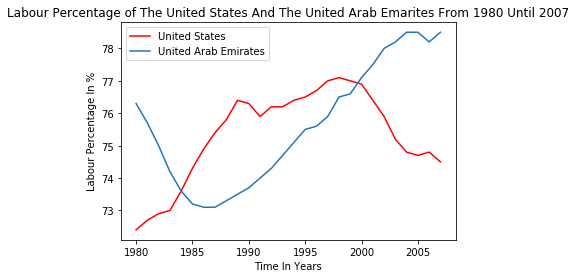

In [104]:
import seaborn as sns

time = np.arange(1980, 2008)
sns.lineplot(x=time,y=final_labour['united_states'], label='United States', color='red');
sns.lineplot(x=time,y=final_labour['united_arab_emirates'], label='United Arab Emirates').set_title('Labour Percentage of The United States And The United Arab Emarites From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Labour Percentage In %');

Lastly, as we know that our data can be looked at from two main perspectives being different countries and time (from 1980 until 2007). Hence, in order to prepare for a general data visualization that would capture both perspectives it is a good idea to represent our data in a map with a button to make the transition between the various years. In order to make this happen, I will be using the python library folium which will allow me to create the different maps (a map for each year). It is good to note here that I will be creating an html file for each map which I will then embed it into another html file with all the maps. This is because after some trial and error, I decided that the data is too big for jupyter notebook to process the images fast enough to consider it a viable option. The next steps are done in order to prepare the country names to align with the GeoJson files that were imported in the background and are going to be utilized to prepare for the creation of the map visualizations.

In [105]:
#This is a set of name replacement of a dataframe created before; the reason behind it is to adjust to the names in the GeoJson file

final_countries.replace(to_replace='United States', value='United States of America', inplace=True)
final_countries.replace(to_replace='Czech Rep.', value='Czech Republic', inplace=True)
final_countries.replace(to_replace='Dominican Rep.', value='Dominican Republic', inplace=True)
final_countries.replace(to_replace='Macedonia, FYR', value='Macedonia', inplace=True)
final_countries.replace(to_replace='Korea, Rep.', value='South Korea', inplace=True)
final_countries.replace(to_replace='Slovak Republic', value='SLovakia', inplace=True)

In [106]:
#These turned dataframes are the way they need to be to utilize them for the folium choropleth map visualizations

final_labour_turn = final_labour.T
final_labour_turn.reset_index(inplace=True)
final_labour_turn['countries'] = final_countries

final_democracy_turn = final_democracy.T
final_democracy_turn.reset_index(inplace=True)
final_democracy_turn['countries'] = final_countries

In [107]:
#This line is to get a 25 and 75 percentile of demoracy values by year, it will later be used to be able to visualize labour,
#salaried employment, and self-employment percentages of countries grouped-by high, neutral, and low democracy.

democracy_split = final_democracy_turn.describe().iloc[[4,6],:]
democracy_split

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
25%,-7.0,-7.0,-7.0,-7.0,-7.0,-7.00,-7.0,-7.0,-7.0,-6.0,...,-1.0,1.0,1.0,1.25,0.25,0.25,0.25,2.0,1.25,1.25
75%,8.0,8.0,8.0,8.0,8.0,8.75,9.0,9.0,9.0,9.0,...,10.0,10.0,10.0,10.00,10.00,10.00,10.00,10.0,10.00,10.00


In [108]:
#These four functions are the functions used to create the maps needed for every year, it is a neat way to create 108 maps
#27 maps (each for a year) and 4 formats one for the all countires, and 3 for 3 democratic levels (High, Neutral, Low)

import folium

def whole_map(dataset, name_of_file, time, bins_set):
    for year in time:
        world_map = folium.Map(location=[23, 3], zoom_start=3, tiles='Mapbox Bright', zoom_control=False, control_scale=True)
        world_geo = r'globe.json'
        folium.Choropleth(geo_data=world_geo, data = dataset, columns=['countries', year], key_on='feature.properties.ADMIN',  fill_color='PuBuGn', legend_name = '%s Percentage Per Country'%(name_of_file,), nan_fill_color='black', bins=bins_set).add_to(world_map)
        folium.LayerControl().add_to(world_map);
        world_map.save('%s%s.html'%(name_of_file,year))
    return;

def low_dem_map(democracy_split, democracy_dataset, dataset, name_of_file, sub_name, time, bins_set):
    count = 0;
    for year in time:
        countries_used = democracy_dataset[democracy_dataset[year] <= democracy_split.iloc[0,count]]['countries']
        mod_dataset = dataset.query('countries in @countries_used').iloc[:,[0,count+1]]
        world_map = folium.Map(location=[23, 3], zoom_start=3, tiles='Mapbox Bright', zoom_control=False, control_scale=True)
        world_geo = r'globe.json'
        folium.Choropleth(geo_data=world_geo, data = mod_dataset, columns=['countries', year], key_on='feature.properties.ADMIN',  fill_color='PuBuGn', legend_name = '%s Percentage Per %s Country'%(name_of_file,sub_name), nan_fill_color='black', bins=bins_set).add_to(world_map)
        folium.LayerControl().add_to(world_map);
        world_map.save('%s%s%s.html'%(sub_name,name_of_file,year))
        count = count + 1
    return;

def mid_dem_map(democracy_split, democracy_dataset, dataset, name_of_file, sub_name, time, bins_set):
    count = 0;
    for year in time:
        countries_used = democracy_dataset[democracy_dataset[year] > democracy_split.iloc[0,count]]['countries']
        countries_mod = democracy_dataset[democracy_dataset[year] < democracy_split.iloc[1,count]]['countries']
        merged_countries = pd.merge(countries_used.to_frame(), countries_mod.to_frame(), how='inner')
        last_countries = merged_countries.iloc[:,0]
        mod_dataset = dataset.query('countries in @last_countries').iloc[:,[0,count+1]]
        world_map = folium.Map(location=[23, 3], zoom_start=3, tiles='Mapbox Bright', zoom_control=False, control_scale=True)
        world_geo = r'globe.json'
        folium.Choropleth(geo_data=world_geo, data = mod_dataset, columns=['countries', year], key_on='feature.properties.ADMIN',  fill_color='PuBuGn', legend_name = '%s Percentage Per %s Country'%(name_of_file,sub_name), nan_fill_color='black', bins=bins_set).add_to(world_map)
        folium.LayerControl().add_to(world_map);
        world_map.save('%s%s%s.html'%(sub_name,name_of_file,year))
        count = count + 1
    return;

def high_dem_map(democracy_split, democracy_dataset, dataset, name_of_file, sub_name, time, bins_set):
    count = 0;
    for year in time:
        countries_used = democracy_dataset[democracy_dataset[year] >= democracy_split.iloc[1,count]]['countries']
        mod_dataset = dataset.query('countries in @countries_used').iloc[:,[0,count+1]]
        world_map = folium.Map(location=[23, 3], zoom_start=3, tiles='Mapbox Bright', zoom_control=False, control_scale=True)
        world_geo = r'globe.json'
        folium.Choropleth(geo_data=world_geo, data = mod_dataset, columns=['countries', year], key_on='feature.properties.ADMIN',  fill_color='PuBuGn', legend_name = '%s Percentage Per %s Country'%(name_of_file,sub_name), nan_fill_color='black', bins=bins_set).add_to(world_map)
        folium.LayerControl().add_to(world_map);
        world_map.save('%s%s%s.html'%(sub_name,name_of_file,year))
        count = count + 1
    return;

***
Note that the below code cell doesn't have to be executed because their output is going to be represented after modifying the html files into one. The output will be in the next section: Data Exploration.

In [46]:
#Calling first function for all three datasets
bins = [43,50,57,64,71,78,85,92]

whole_map(final_labour_turn, 'Labour', time.astype('U'),bins)
low_dem_map(democracy_split, final_democracy_turn, final_labour_turn, 'Labour', 'Low Democracy', time.astype('U'), bins)
mid_dem_map(democracy_split, final_democracy_turn, final_labour_turn, 'Labour', 'Neutral-Democratically', time.astype('U'), bins)
high_dem_map(democracy_split, final_democracy_turn, final_labour_turn, 'Labour', 'High Democracy', time.astype('U'), bins)

### _Part 3: Data Exploration_

Due to some complications with the IPython HTML display functionality, I had to create a link to the local html file created for the Labour percentage map from 1980 until 2007. This map is an interactive map which shows the percentage of labour in 114 countries (countries that we had clean data to work with) in a specific year using a declared color scheme. In addition, the map allows to switch between the years in order to visualize the change in labour across the world during the period of time of interest, and there is the ability to view the labour percentages of countries based on how democratic they are (high, nuetral, and low).

It is good to note here that the below map is a neat compact way to summarize and visualize the data we have about the interaction of labour, democracy, and time in 114 countries. This map in no means has the capability to determine any certainty about a causation between labour, democracy and time. However, it could be considered a great visual aid to determine what questions might be interesting to answer about specific countries, or during a specific year, and so on. In fact, this report is going to conclude with descriptive statements rather than using statiscal proof of any statement or using machine learning. 

This [link](labour_all_map.html)  is an HTML file that combined snaps of the maps produced using the code above. It is recommended to open the link on the side and follow the data analysis and exploration brought to light in the next few paragraphs. After pointing out some interesting observations using this map, I will utilize some line graphs about salaried employment and self-employment about specific countries to further the insights found in the map.

The first observation I would like to talk about is the general trend of labour percentages of countries in different continents. By going through the years while focusing on different continents, we can see that most countries in all continents shift towards a higher color in the scheme as the time component approaches current times. This means that labour percentages of countries in the Americas, Africa, and part of Asia have increased between the years 1980 and 2007. However, European countries in general show the opposite. Most of the countries either drop or stay constant as we observe the labour percentages during that period of time.

Secondly, if we shift between maps of high democratic countries, neutrally democratic countries, and low democratic countries we cannot observe any obvious trends related to the the labour percentages accross the years. In other words, the countries in the three categories based on democracy include countries with labour percentages all over the color scheme. Thus, we can say that analysing the corelation between how democratic a country is and its labour percentage most likely would not yield any conclusive connection between the two variables.

This being said, it might be interesting to compare and contrast specific countries in the same democratic category to further assess how might these countries relate to each other. For example, I will start with countries that are categorized as high democratic countries from 1980 until 2007: USA, Norway, Finland, UK, and Canada.

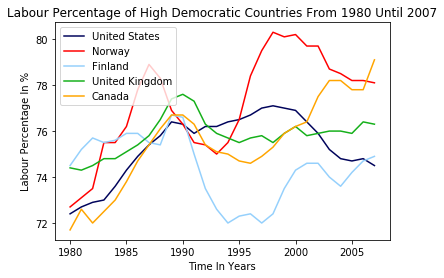

In [173]:
time = np.arange(1980, 2008)
sns.lineplot(x=time,y=final_labour['united_states'], label='United States', color=sns.xkcd_rgb['dark blue']);
sns.lineplot(x=time,y=final_labour['norway'], label='Norway', color='red');
sns.lineplot(x=time,y=final_labour['finland'], label='Finland', color=sns.xkcd_rgb['light blue']);
sns.lineplot(x=time,y=final_labour['united_kingdom'], label='United Kingdom', color=sns.xkcd_rgb['green']);
sns.lineplot(x=time,y=final_labour['canada'], label='Canada', color='orange').set_title('Labour Percentage of High Democratic Countries From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Labour Percentage In %');

As we can see in the above graph, the labour percentages of the countries vary a lot with no clear connection, except for a possible increase in all countries during the late 80s and early 90s. However, in general the lines are volatile in all countries and lack any potential helpful informaion. We can take a look at countries that are categorized as neutrally democratic countries from 1980 until 2007: Brazil, Spain, Mali, and Madagascar.

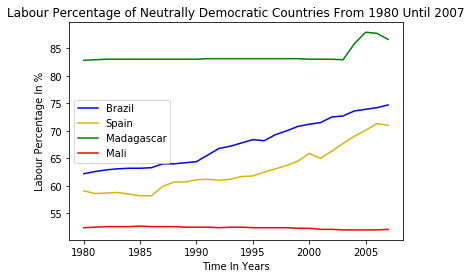

In [172]:
time = np.arange(1980, 2008)
sns.lineplot(x=time,y=final_labour['brazil'], label='Brazil', color='blue');
sns.lineplot(x=time,y=final_labour['spain'], label='Spain', color=sns.xkcd_rgb['dark yellow']);
sns.lineplot(x=time,y=final_labour['madagascar'], label='Madagascar', color='green');
sns.lineplot(x=time,y=final_labour['mali'], label='Mali', color='red').set_title('Labour Percentage of Neutrally Democratic Countries From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Labour Percentage In %');

This graph is interesting because we can observe that the labour percentages of both Brazil and Spain are on a consistant increase through the timeline, and Madagascar and Mali in general are constant (except for Madagascar after 2003, which could be a potential interest to further study the reason of that spike). This in no means correlates neutral democracy in a country to a steady labour or increased labour. As we mentioned before, there is no clear suggestion for this kind of relationship. However, this could mean that certain countries yield better labour percentages due to some variable that is not researched in this report. This provides an insight to further research variables in countries like Spain and Brazil that could be correlated to the increase in labour percentages.

We can take a look at self-employment in Spain and Brazil in order to check whether there is any connection between self-employment in these countries and the increase in their labour.

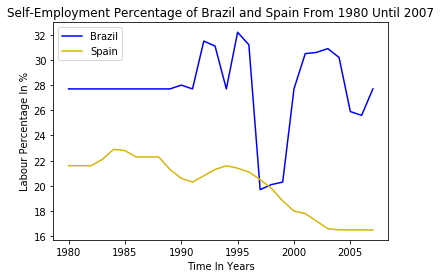

In [176]:
time = np.arange(1980, 2008)
sns.lineplot(x=time,y=final_selfemployed['brazil'], label='Brazil', color='blue');
sns.lineplot(x=time,y=final_selfemployed['spain'], label='Spain', color=sns.xkcd_rgb['dark yellow']).set_title('Self-Employment Percentage of Brazil and Spain From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Labour Percentage In %');

As we can see from the above graph, there is no clear trend in self-employment in Brazil. But Spain is in a consistant decrease. This means that Spain has an increased salaried employment since the self-employment and salaried employment are inversely propotional as we can in the graph below.

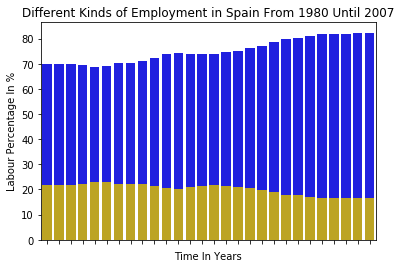

In [197]:
time = np.arange(1980, 2008)
g = sns.barplot(x=time,y=final_employee['spain'], label='Salaried Emplyment', color='blue');
f = sns.barplot(x=time,y=final_selfemployed['spain'], label='Self-Employment', color=sns.xkcd_rgb['dark yellow']).set_title('Different Kinds of Employment in Spain From 1980 Until 2007');
g.set(xticklabels=[])
plt.xlabel('Time In Years');
plt.ylabel('Labour Percentage In %');

We can observe here that in Spain, self-employment and labour percentages are inverserly propotional. I will present the last set of countries that are categorized as low democratic countries from 1980 until 2007: Vietnam, Panama, Cuba, and Uited Arab Emarites.

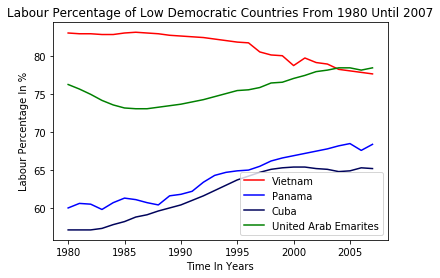

In [226]:
time = np.arange(1980, 2008)
sns.lineplot(x=time,y=final_labour['vietnam'], label='Vietnam', color='red');
sns.lineplot(x=time,y=final_labour['panama'], label='Panama', color='blue');
sns.lineplot(x=time,y=final_labour['cuba'], label='Cuba', color=sns.xkcd_rgb['dark blue']);
sns.lineplot(x=time,y=final_labour['united_arab_emirates'], label='United Arab Emarites', color='green').set_title('Labour Percentage of Low Democratic Countries From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Labour Percentage In %');

This graph shows that most low democratic countries have a steady increase in their labour percentages (except in Vietnam,  it can be argued that the decrease in labour could be a potential aftermath of the Vietnam War). This trend of increasing labour is consistent in the rest of low democratic countries. It could be said that there is a potential correlation between being a low democratic country and increasing labour percentage in the country.

The last observation I will make is between the averages of self-employment and salaried employment of the 114 countries across the same period of time. This is intended to understand whether there is any trend toward one type of employment or another just based on time.

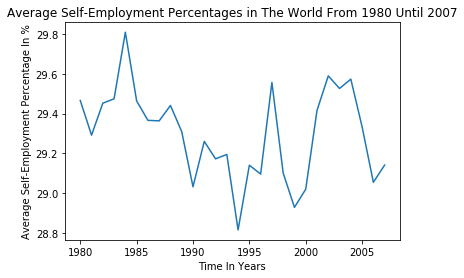

In [258]:
time = np.arange(1980, 2008)
sns.lineplot(x=time, y=final_selfemployed.mean(axis=1)).set_title('Average Self-Employment Percentages in The World From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Average Self-Employment Percentage In %');

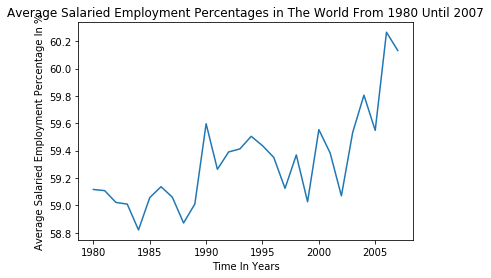

In [259]:
time = np.arange(1980, 2008)
sns.lineplot(x=time, y=final_employee.mean(axis=1)).set_title('Average Salaried Employment Percentages in The World From 1980 Until 2007');
plt.xlabel('Time In Years');
plt.ylabel('Average Salaried Employment Percentage In %');

As we can observe from the above two graphs, self-employment has no clear relation with time, however, there is a potential corelation between salaried employment and time.

### _Part 4: Conclusion_

The coclusion will be simple answers to the original questions from part 1 based on our data exploration in part 3:

* Does the democratic value of a country have an effect on the labour force in that country?
* How does the labour force evolve across time?
* Are people tending to be self-employed more in the 21st century? If yes, how do more democratic countries compare to less democratic countries in that respect?

We can conclude that there was no obvious connection between how democratic a country is and the percentage of the labour in the country. Even though, low democratic countries like UAE and Panama, or neutrally democratic countries like Brazil and Spain had a clear steady increase in their labour percentages, we cannot conclude any correlation until further assessment of other variables or the use of statistical modelling, which was not the purpose of this report.

The labour percentage was observed in general to an increase over time in all continents but Europe. However, this is not an inclusive statement since countries like the Netherlands still went through increase in labour percentages over time and countries like Algeria went through a decrease in labour percentages.

Lastly, it can be said that there was an expectation of increase in self-employment in the 21st century due to the new entrepreneurship trend. Our data (or at least the data provided by the International Labour Organization) shows exactly the opposite, it shows that salaried employment in on the rise. This statement could be adjusted in favor of self-employment if we would have had the data from the last 10 years. 